## Problem Statement:
- The objective is to analyze the flight booking dataset obtained from a platform which is used to book flight tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers. Apply **EDA**, **statistical methods** and **Machine learning** algorithms in order to get meaningful information from it.

## Dataset Information:
- Flight booking price prediction dataset contains around **`3 lalkh`** records with **`11 features`**

![image.png](attachment:image.png)

## Importing Necessary Libraries

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *

In [ ]:
#Importing the dataset
df=pd.read_csv("/content/Flight_Booking.csv")

In [ ]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## EDA

In [ ]:
#Shape of the data
print(f'This dataset has {df.shape[1]} features and {df.shape[0]} instances.')

This dataset has 12 features and 300153 instances.


In [ ]:
def null_and_duplicates(df):
  #Check for Null values
  print('-'*60)
  if df.isna().sum().sum()==0:
    print(f'This dataset has no Null values')
  else:
    print(f'{df.isna().sum()}')
    print('-'*60)
    print(f'Count of Null Values:{df.isna().sum().sum()}')
    print()
    print('*'*60)
  ##Check for Duplicate Values
    print("Duplicate Values")
    print('-'*60)
    print()
  if df.duplicated().sum()==0:
    print(f'This dataset has no Duplicate values')
    print('-'*60)
  else:
    print(f'Count of Duplicate Values:{df.duplicated().sum()}')
    print('-'*60)

null_and_duplicates(df)

------------------------------------------------------------
This dataset has no Null values
This dataset has no Duplicate values
------------------------------------------------------------


In [ ]:
#Dropping 'Unnamed: 0' feature as it is not useful for further analysis
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
def object_columns(df):
  return df.select_dtypes(include='object')

cat_var=object_columns(df)
cat_var=cat_var.drop('flight',axis=1)
cat_var.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy


airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
--------------------------------------------------------------------------------
airline
Vistara      42.597942
Air_India    26.950255
Indigo       14.366007
GO_FIRST      7.720396
AirAsia       5.363265
SpiceJet      3.002136
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


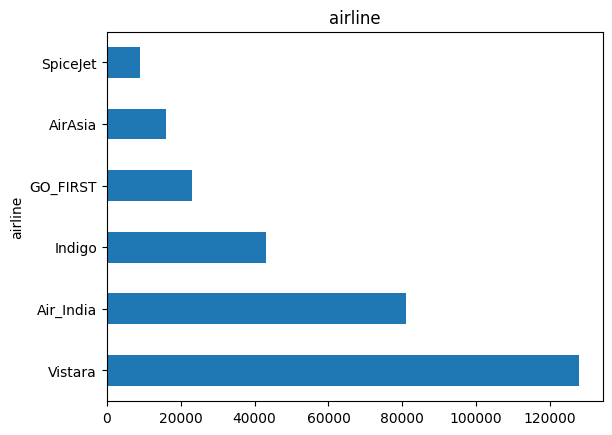


****************************************************************************************************
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64
--------------------------------------------------------------------------------
source_city
Delhi        20.437244
Mumbai       20.288320
Bangalore    17.344821
Kolkata      15.441125
Hyderabad    13.595067
Chennai      12.893424
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


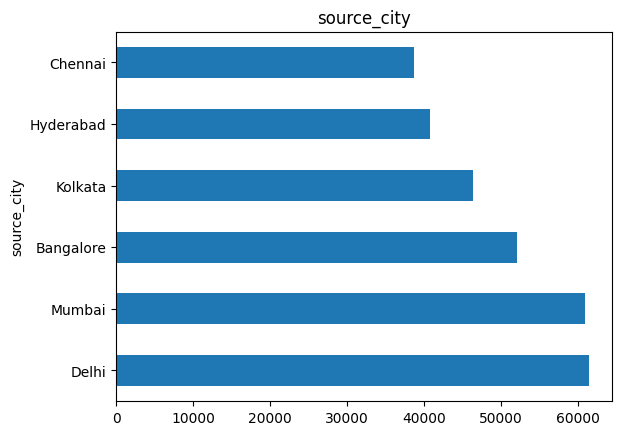


****************************************************************************************************
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64
--------------------------------------------------------------------------------
departure_time
Morning          23.703245
Early_Morning    22.251985
Evening          21.689605
Night            15.996842
Afternoon        15.923212
Late_Night        0.435111
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


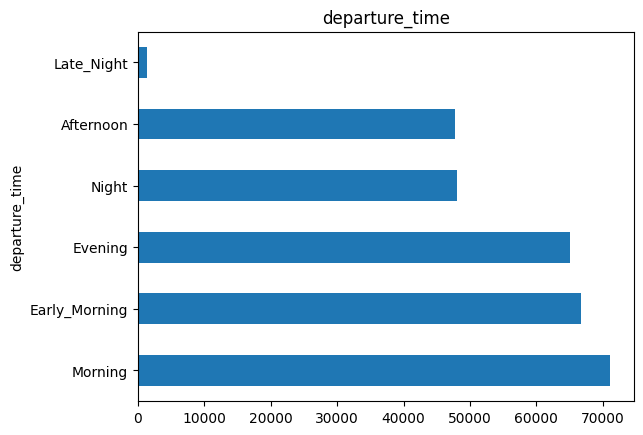


****************************************************************************************************
stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64
--------------------------------------------------------------------------------
stops
one            83.578375
zero           11.995216
two_or_more     4.426409
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


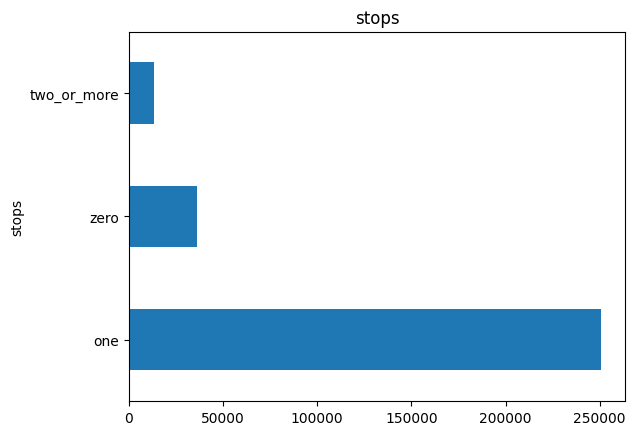


****************************************************************************************************
arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64
--------------------------------------------------------------------------------
arrival_time
Night            30.497113
Evening          26.094359
Morning          20.901007
Afternoon        12.706520
Early_Morning     5.136380
Late_Night        4.664621
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


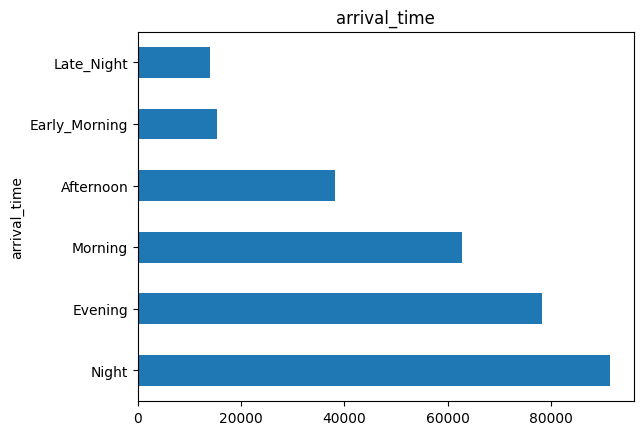


****************************************************************************************************
destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64
--------------------------------------------------------------------------------
destination_city
Mumbai       19.688959
Delhi        19.110254
Bangalore    17.013990
Kolkata      16.502917
Hyderabad    14.234740
Chennai      13.449141
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


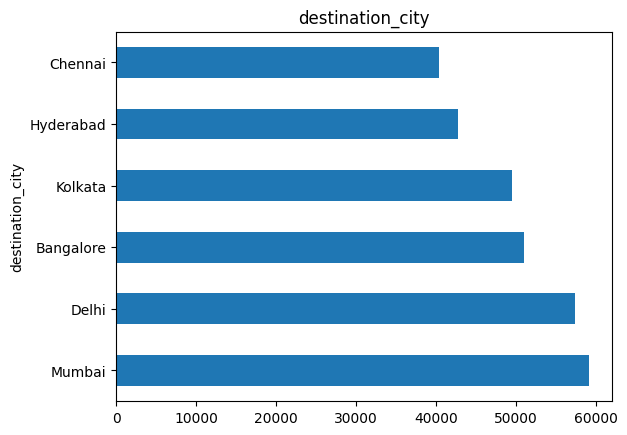


****************************************************************************************************
class
Economy     206666
Business     93487
Name: count, dtype: int64
--------------------------------------------------------------------------------
class
Economy     68.853551
Business    31.146449
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Axes(0.125,0.11;0.775x0.77)


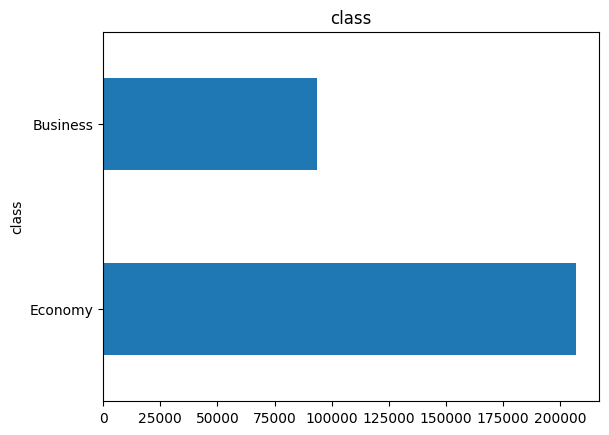


****************************************************************************************************


In [ ]:
#Categorical Variables Analysis
for i in cat_var.columns:
  print(cat_var[i].value_counts())
  print('-'*80)
  print(cat_var[i].value_counts(normalize=True)*100)
  print('-'*80)
  print(cat_var[i].value_counts().plot(kind='barh'))
  plt.title(i)
  plt.show()
  print()
  print('*'*100)

Axes(0.125,0.11;0.775x0.77)


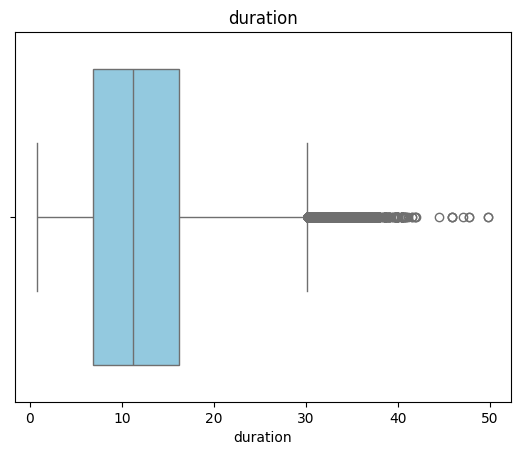


********************************************************************************
Axes(0.125,0.11;0.775x0.77)


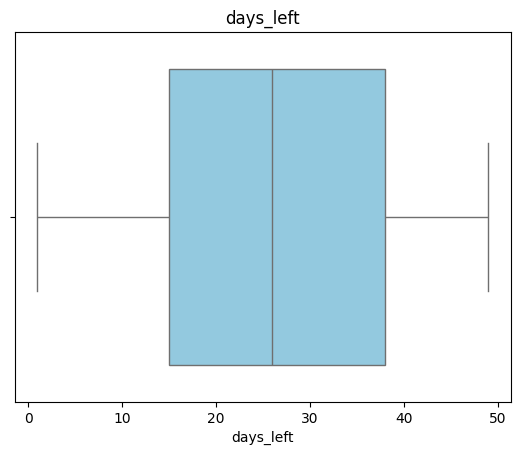


********************************************************************************
Axes(0.125,0.11;0.775x0.77)


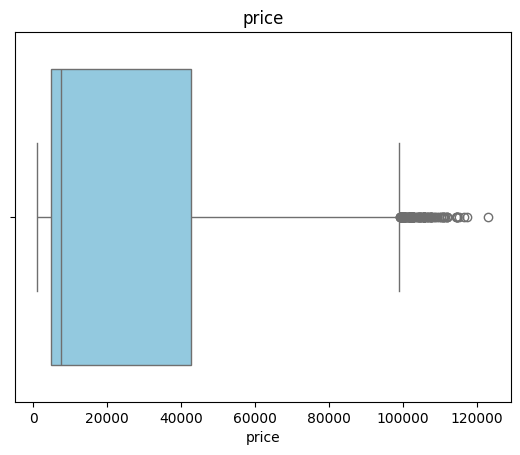


********************************************************************************


In [ ]:
##Outlier Analysis
num_var=['duration','days_left','price']
for i in num_var:
    print(sns.boxplot(df[i],color='skyblue',orient='h'))
    plt.title(i)
    plt.show()
    print()
    print('*'*80)

In [ ]:
#Dropping Outliers
Outliers=['duration','price']

for col in Outliers:
    Q3=df[col].quantile(0.75)
    Q1=df[col].quantile(0.25)
    IQR=Q3-Q1
    UL=Q3 + 1.5 * IQR #Upper Limit
    LL=Q1 - 1.5 * IQR #Lower Limit
    df= df[(df[col] >= LL) & (df[col] <= UL)]

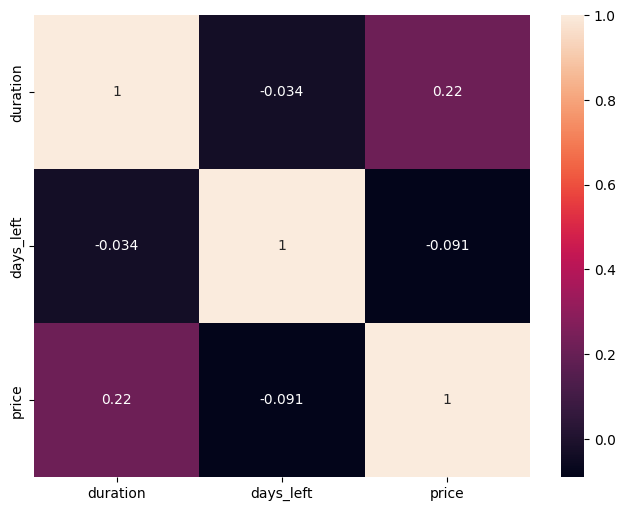

In [ ]:
#Correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

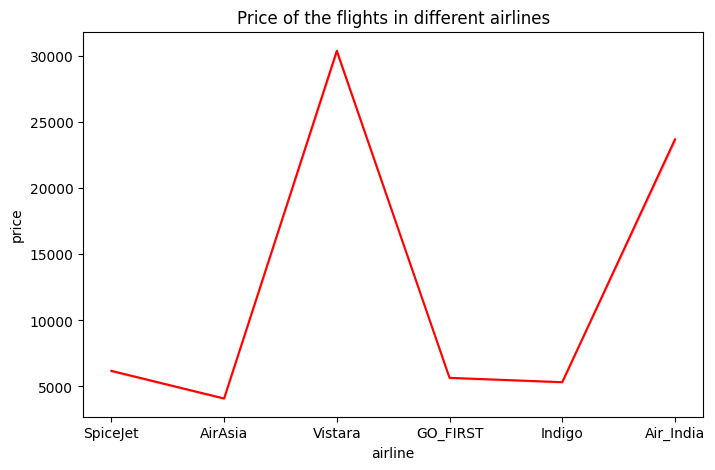

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df['airline'],y=df['price'],data=df,color='red')
plt.title('Price of the flights in different airlines')
plt.show()

- From the above graph,we can conclude that the prices of **`Vistara`** and **`Airindia`** are higher when compared with other airline companies

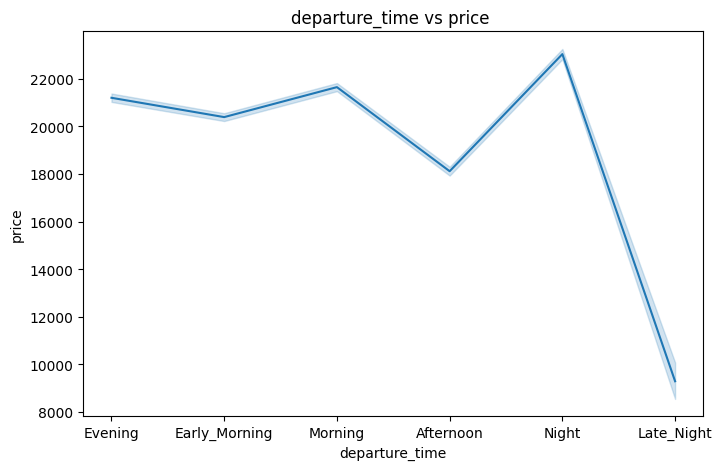

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df['departure_time'],y=df['price'],data=df)
plt.title('departure_time vs price ')
plt.show()

- From the above graph we can conclude that prices of flights at `late_night` are `cheap` when compared to other timings of the day

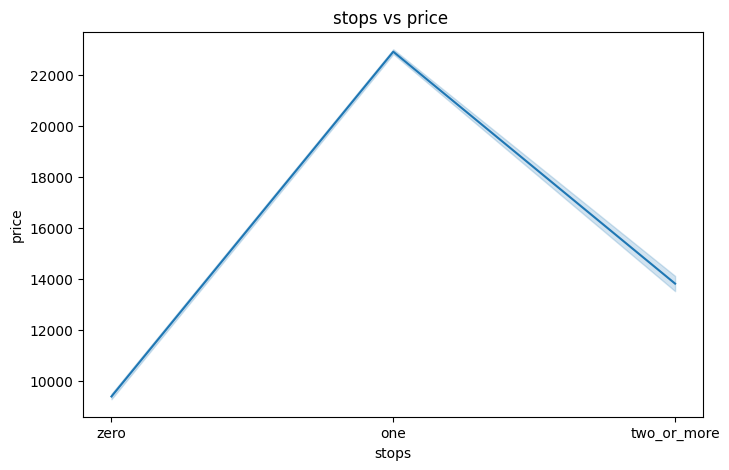

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df['stops'],y=df['price'],data=df)
plt.title('stops vs price ')
plt.show()

- From the above graph we can conclude that prices of flights with **`one stop`** are **`higher`** when compared to zero stops or more than two stops.

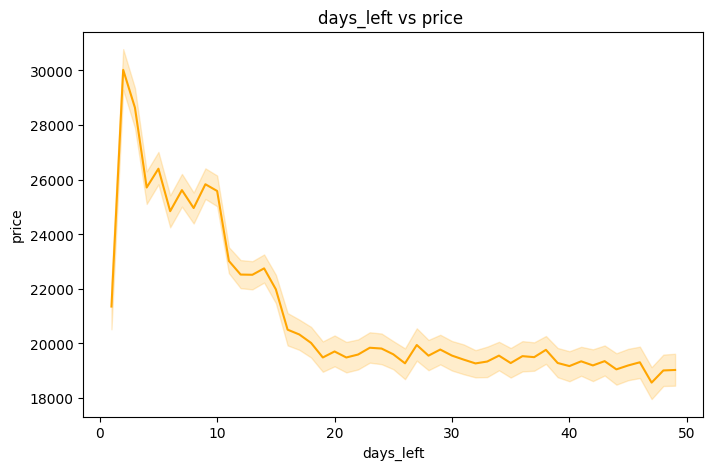

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df['days_left'],y=df['price'],data=df,color='orange')
plt.title('days_left vs price ')
plt.show()

- As the days increasing for **`departure price`** of the flight is decreasing

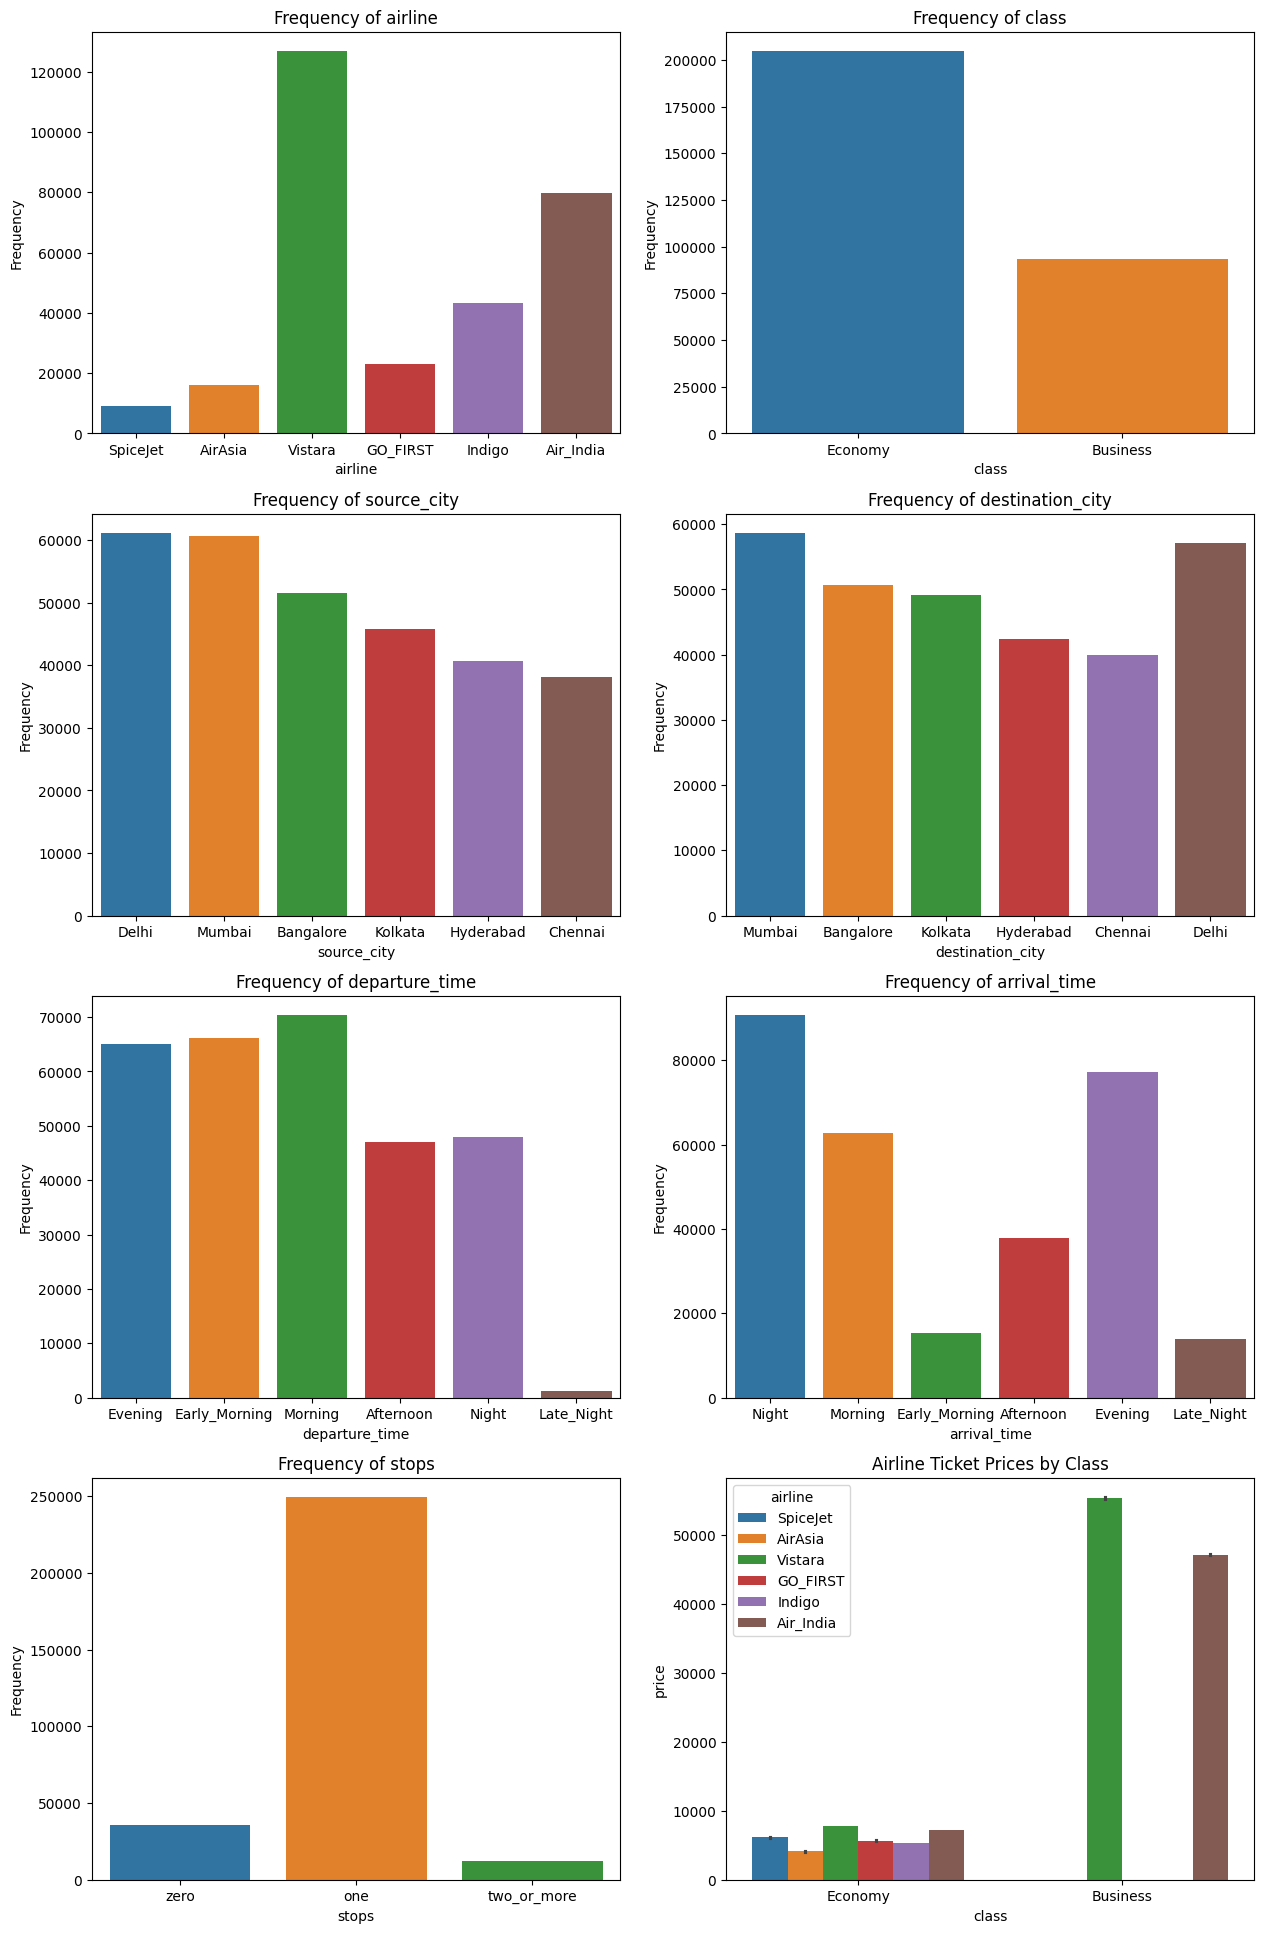

In [ ]:
plt.figure(figsize=(15,24))

plt.subplot(4,2,1)
sns.countplot(x=df['airline'],data=df,hue=df['airline'])
plt.title('Frequency of airline')
plt.ylabel('Frequency')

plt.subplot(4,2,2)
sns.countplot(x=df['class'],data=df,hue=df['class'])
plt.title('Frequency of class')
plt.ylabel('Frequency')

plt.subplot(4,2,3)
sns.countplot(x=df['source_city'],data=df,hue=df['source_city'])
plt.title('Frequency of source_city')
plt.ylabel('Frequency')

plt.subplot(4,2,4)
sns.countplot(x=df['destination_city'],data=df,hue='destination_city')
plt.title('Frequency of destination_city')
plt.ylabel('Frequency')

plt.subplot(4,2,5)
sns.countplot(x=df['departure_time'],data=df,hue='departure_time')
plt.title('Frequency of departure_time')
plt.ylabel('Frequency')

plt.subplot(4,2,6)
sns.countplot(x=df['arrival_time'],data=df,hue='arrival_time')
plt.title('Frequency of arrival_time')
plt.ylabel('Frequency')

plt.subplot(4,2,7)
sns.countplot(x=df['stops'],data=df,hue='stops')
plt.title('Frequency of stops')
plt.ylabel('Frequency')

plt.subplot(4,2,8)
sns.barplot(x='class',y='price',data=df,hue='airline')
plt.title('Airline Ticket Prices by Class')

plt.show()


#### Insights from the above graphs.
- 1.`Vistara` airline is the most in demand airline,after vistara air india is at second position.(Graph 1)
- 2.Most of the people are travelling in `Economy` class.(Graph 2)
- 3.`Late night` departures are very less compared to other timings of the day.(Graph 5)
- 4.Frequency of arrivals is very less at `early morning` and `late night`. (Graph 6)
- 5.Most of the flights are having `one stop`.(Graph 7)

## Label Encoding:

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=le.fit_transform(df[i])

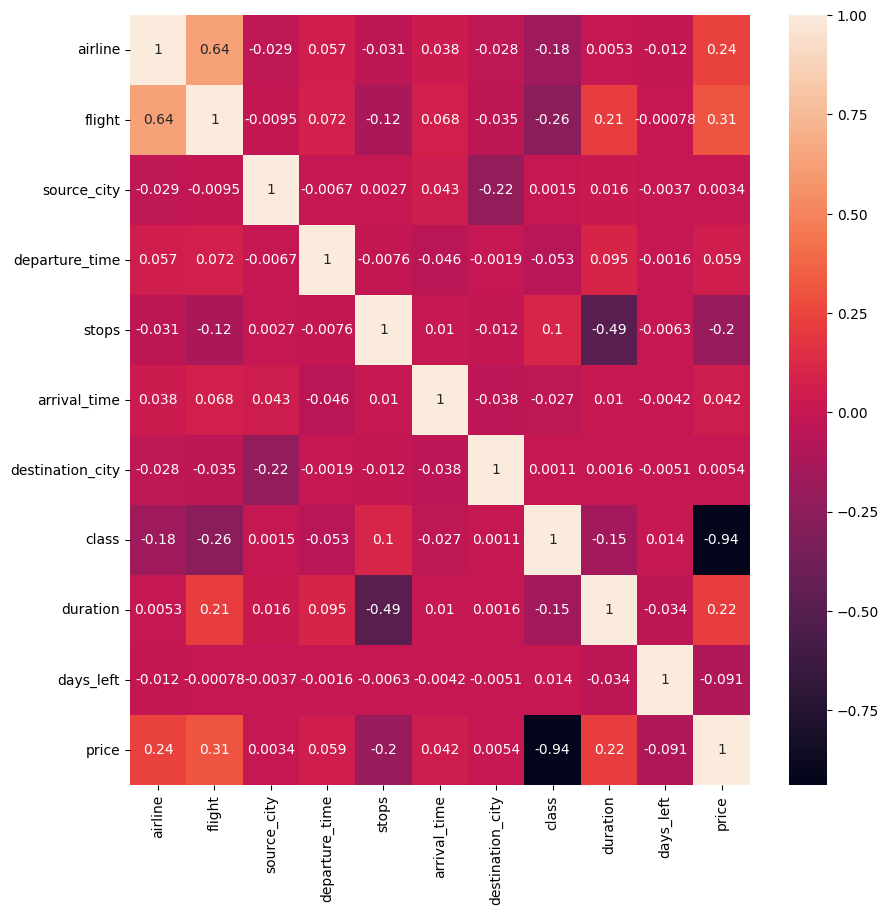

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Feature Selection
- Variance_inflation_factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#Check 1
col=[]
for i in df.columns:
    if ((df[i].dtype != 'object') and (i != 'price')):
        col.append(i)

x=df[col]
vif=pd.DataFrame()
vif['features']=x.columns
vif['value']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,features,value
0,airline,6.685307
1,flight,12.662201
2,source_city,2.985762
3,departure_time,2.827016
4,stops,1.465479
5,arrival_time,3.788111
6,destination_city,2.924579
7,class,2.839927
8,duration,5.002091
9,days_left,4.088904


In [ ]:
#Dropping flight due to high vif
df=df.drop('flight',axis=1)

In [ ]:
#Check 2
col=[]
for i in df.columns:
    if ((df[i].dtype != 'object') and (i != 'price')):
        col.append(i)
x=df[col]
vif=pd.DataFrame()
vif['features']=x.columns
vif['value']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,features,value
0,airline,3.409482
1,source_city,2.946912
2,departure_time,2.803413
3,stops,1.452338
4,arrival_time,3.690532
5,destination_city,2.892788
6,class,2.837463
7,duration,4.316253
8,days_left,3.998231


In [ ]:
# Dividing features and target variables
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

# Model Building:

### Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=8)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train_Std=sc.fit_transform(x_train)
x_test_Std=sc.transform(x_test)

In [ ]:
lr=LinearRegression()

In [ ]:
model_lr=lr.fit(x_train_Std,y_train)

In [ ]:
y_pred_lr=model_lr.predict(x_test_Std)

In [ ]:
r2=r2_score(y_test,y_pred_lr)#R2 score
r2

0.9058625824046402

In [ ]:
mae=mean_absolute_error(y_test,y_pred_lr)#Mean absolute error

In [ ]:
maep=mean_absolute_percentage_error(y_test,y_pred_lr)#Mean absolute error percentage

In [ ]:
mse=mean_squared_error(y_test,y_pred_lr)#Mean squared error

In [ ]:
rmse=np.sqrt(mse)#Root mean squred error

In [ ]:
print('R2 score of Linear Regression model                      :',r2)
print('Mean absolute error of Linear Regression model           :',mae)
print('Mean absolute percentage error of Linear Regression model:',maep)
print('Mean squared error of Linear Regression model            :',mse)
print('Root mean squared error of Linear Regression model       :',rmse)

R2 score of Linear Regression model                      : 0.9058625824046402
Mean absolute error of Linear Regression model           : 4616.164339172972
Mean absolute percentage error of Linear Regression model: 0.43856001006799245
Mean squared error of Linear Regression model            : 48209659.22049735
Root mean squared error of Linear Regression model       : 6943.317594673122


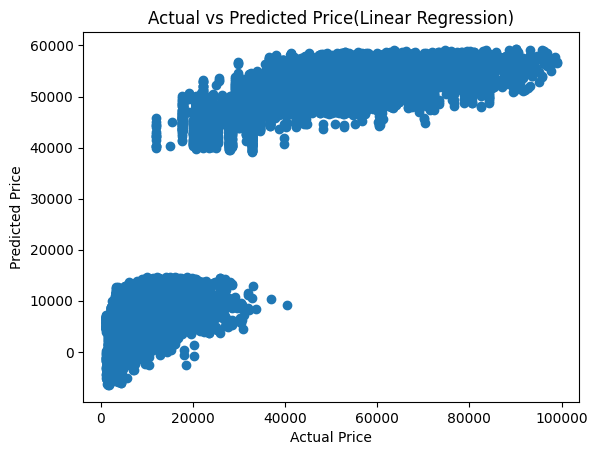

In [ ]:
plt.scatter(y_test,y_pred_lr)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price(Linear Regression)')
plt.show()

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [ ]:
model_dt=dt.fit(x_train_Std,y_train)

In [ ]:
y_pred_dt=model_dt.predict(x_test_Std)

In [ ]:
r2_dt=r2_score(y_test,y_pred_dt)#R2 score

In [ ]:
mae_dt=mean_absolute_error(y_test,y_pred_dt)#Mean absolute error
maep_dt=mean_absolute_percentage_error(y_test,y_pred_dt)#Mean absolute error percentage
mse_dt=mean_squared_error(y_test,y_pred_dt)#Mean squared error
rmse_dt=np.sqrt(mse_dt)#Root mean squred error

In [ ]:
print('R2 score of Decision Tree model                      :',r2_dt)
print('Mean absolute error of Decision Tree model           :',mae_dt)
print('Mean absolute percentage error of Decision Tree model:',maep_dt)
print('Mean squared error of Decision Tree model            :',mse_dt)
print('Root mean squared error of Decision Tree model       :',rmse_dt)

R2 score of Decision Tree model                      : 0.9762351995002266
Mean absolute error of Decision Tree model           : 1176.008344409984
Mean absolute percentage error of Decision Tree model: 0.07581947744730015
Mean squared error of Decision Tree model            : 12170430.874382205
Root mean squared error of Decision Tree model       : 3488.6144634198554


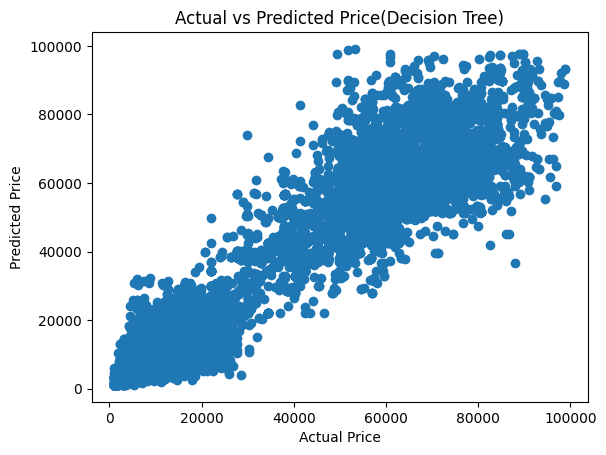

In [ ]:
plt.scatter(y_test,y_pred_dt)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price(Decision Tree)')
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=50,min_samples_leaf=7,random_state=42)

In [ ]:
model_rf=rf.fit(x_train_Std,y_train)

In [ ]:
y_pred_rf=model_rf.predict(x_test_Std)

In [ ]:
r2_rf=r2_score(y_test,y_pred_rf)#R2 score
mae_rf=mean_absolute_error(y_test,y_pred_rf)#Mean absolute error
maep_rf=mean_absolute_percentage_error(y_test,y_pred_rf)#Mean absolute error percentage
mse_rf=mean_squared_error(y_test,y_pred_rf)#Mean squared error
rmse_rf=root_mean_squared_error(y_test,y_pred_rf)#Root MEan Squared Error

In [ ]:
print('R2 score of Random Forest model                      :',r2_rf)
print('Mean absolute error of Random Forest model           :',mae_rf)
print('Mean absolute percentage error of Random Forest model:',maep_rf)
print('Mean squared error of Random Forest model            :',mse_rf)
print('Root mean squared error of Random Forest model       :',rmse_rf)
print('-'*80)
y_train_pred_rf = model_rf.predict(x_train_Std)
y_test_pred_rf = model_rf.predict(x_test_Std)

train_rmse=root_mean_squared_error(y_train,y_train_pred_rf)
test_rmse=root_mean_squared_error(y_test, y_test_pred_rf)
train_r2 = r2_score(y_train, y_train_pred_rf)
test_r2 = r2_score(y_test, y_test_pred_rf)

print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Training R²:", train_r2)
print("Test R²:", test_r2)

R2 score of Random Forest model                      : 0.985598088123395
Mean absolute error of Random Forest model           : 1245.455964712517
Mean absolute percentage error of Random Forest model: 0.08713274734084582
Mean squared error of Random Forest model            : 7375507.8631877275
Root mean squared error of Random Forest model       : 2715.7886263823493
--------------------------------------------------------------------------------
Training RMSE: 2333.5762430878844
Test RMSE: 2715.7886263823493
Training R²: 0.9894195173041639
Test R²: 0.985598088123395


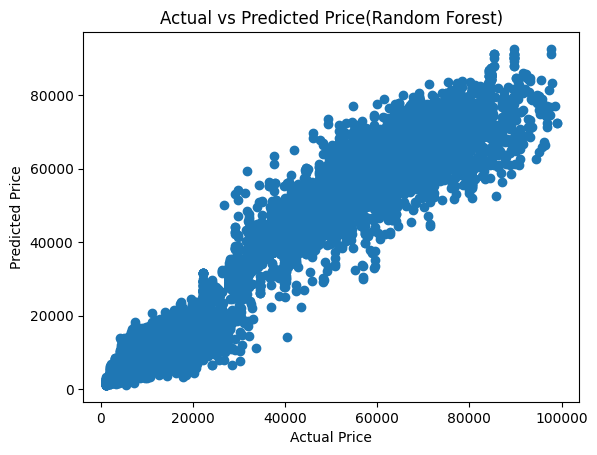

In [ ]:
plt.scatter(y_test,y_pred_rf)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price(Random Forest)')
plt.show()

## XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xg=XGBRegressor()

In [ ]:
model_xg=xg.fit(x_train,y_train)

In [ ]:
y_pred_xg=model_xg.predict(x_test)

In [ ]:
r2_xg=r2_score(y_test,y_pred_xg)#R2 score
mae_xg=mean_absolute_error(y_test,y_pred_xg)#Mean absolute error
maep_xg=mean_absolute_percentage_error(y_test,y_pred_xg)#Mean absolute error percentage
mse_xg=mean_squared_error(y_test,y_pred_xg)#Mean squared error
rmse_xg=root_mean_squared_error(y_test,y_pred_xg)#Root Mean Squared Error

In [ ]:
print('R2 score of xgboost model                      :',r2_xg)
print('Mean absolute error of xgboost model           :',mae_xg)
print('Mean absolute percentage error of xgboost model:',maep_xg)
print('Mean squared error of xgboost model            :',mse_xg)
print('Root mean squared error of xgboost model       :',rmse_xg)
print('-'*80)
y_train_pred_xg = model_xg.predict(x_train)
y_test_pred_xg = model_xg.predict(x_test)

train_rmse=root_mean_squared_error(y_train, y_train_pred_xg)
test_rmse=root_mean_squared_error(y_test, y_test_pred_xg)
train_r2 = r2_score(y_train, y_train_pred_xg)
test_r2 = r2_score(y_test, y_test_pred_xg)

print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Training R²:", train_r2)
print("Test R²:", test_r2)

R2 score of xgboost model                      : 0.9764997363090515
Mean absolute error of xgboost model           : 2002.577392578125
Mean absolute percentage error of xgboost model: 0.1492200791835785
Mean squared error of xgboost model            : 12034967.0
Root mean squared error of xgboost model       : 3469.14501953125
--------------------------------------------------------------------------------
Training RMSE: 3378.40283203125
Test RMSE: 3469.14501953125
Training R²: 0.9778239130973816
Test R²: 0.9764997363090515


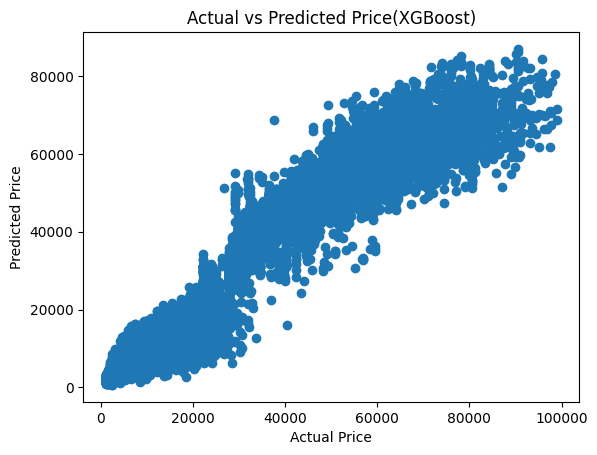

In [ ]:
plt.scatter(y_test,y_pred_xg)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price(XGBoost)')
plt.show()

##Conclusion:

"In this analysis, we explored four different **machine learning** models to predict flight prices: **Linear Regression**, **Decision Tree**, **Random Forest**, and **XGBoost**. We evaluated the models using key metrics such as **R-squared(R2)** and **RMSE**.

- **`Linear Regression:`** While providing a decent baseline with an R2 score of 0.91, it exhibited higher error values (RMSE: 6943, MAE: 4616, MAPE: 0.44) indicating limitations in capturing complex relationships within the data.
- **`Decision Tree:`** Descision Tree Was prone to overfitting, although it had good performance on the data,It achieved a R2 score of 0.98, indicating a better fit compared to Linear Regression. The error values were also considerably lower (RMSE: 3488, MAE: 1176, MAPE: 0.08)
- **`Random Forest:`** Random Forest showed significant improvement with the highest R2 score of 0.99, signifying a strong ability to handle complex relationships and reduce overfitting. This model also boasts the lowest error values among the four (RMSE: 2715, MAE: 1245, MAPE: 0.09).
- **`XGBoost:`** XGBoost While not as performant as Random Forest, XGBoost still delivered excellent results with an R2 score of 0.98 and relatively low error values (RMSE: 3469, MAE: 2002, MAPE: 0.15). This model showcases its strength in handling prediction tasks

- Based on the evaluation, the **Random Forest** and **XGBoost** models are the most promising for flight **price prediction**. Further hyperparameter tuning and feature engineering could potentially enhance the accuracy of these models even further.

- This analysis highlights the importance of **model selection** and **evaluation** in building accurate **machine learning** models for real-world applications. By carefully comparing performance and understanding the strengths and limitations of different algorithms, we can make informed decisions to create valuable predictive tools."


**`PROJECT BY-SHAIK MOHAMMAD SAMEER HUSSAIN`**